### QATAR FIFA 2022 WORLD CUP 
**Using the dataset for sentiment analysis and beautiful visualizations**  

**SENTIMENT ANALYSIS** 
+ Using tweets from the recent 2022 Qatar world cup to get sentiments behind the tweets
    - Postitive 
    - Negative 
    - Neutral 

### Data Credit 
+ Kaggle 

### Data Preprocessing

In [1]:
import pandas as pd 

path = "fifa_world_cup_2022_tweets.csv"
data = pd.read_csv(path)

In [2]:
data.head()

Unnamed: 0               Date Created  Number of Likes  \
0           0  2022-11-20 23:59:21+00:00                4   
1           1  2022-11-20 23:59:01+00:00                3   
2           2  2022-11-20 23:58:41+00:00                1   
3           3  2022-11-20 23:58:33+00:00                1   
4           4  2022-11-20 23:58:28+00:00                0   

       Source of Tweet                                              Tweet  \
0      Twitter Web App  What are we drinking today @TucanTribe \n@MadB...   
1   Twitter for iPhone  Amazing @CanadaSoccerEN  #WorldCup2022 launch ...   
2   Twitter for iPhone  Worth reading while watching #WorldCup2022 htt...   
3      Twitter Web App  Golden Maknae shinning bright\n\nhttps://t.co/...   
4  Twitter for Android  If the BBC cares so much about human rights, h...   

  Sentiment  
0   neutral  
1  positive  
2  positive  
3  positive  
4  negative

In [3]:
data.tail()

Unnamed: 0               Date Created  Number of Likes  \
22519       22519  2022-11-20 00:00:21+00:00                1   
22520       22520  2022-11-20 00:00:03+00:00                0   
22521       22521  2022-11-20 00:00:01+00:00                2   
22522       22522  2022-11-20 00:00:00+00:00               11   
22523       22523  2022-11-20 00:00:00+00:00               24   

          Source of Tweet                                              Tweet  \
22519     Twitter Web App            Here We go World cup 2022 #WorldCup2022   
22520            DenetPro  Anderlecht confirms former Viborg FF's Jesper ...   
22521  Twitter for iPhone  Great thread to read before the start of #Worl...   
22522     Twitter Web App  Raphinha wants Brazil to be united at the #Wor...   
22523     Twitter Web App  How to buy $SOT on PinkSale?🤔\n\nHave you been...   

      Sentiment  
22519  positive  
22520   neutral  
22521  positive  
22522  positive  
22523   neutral

In [4]:
print(data.shape)

(22524, 6)


In [5]:
print(data.isnull().sum())

Unnamed: 0         0
Date Created       0
Number of Likes    0
Source of Tweet    0
Tweet              0
Sentiment          0
dtype: int64


In [6]:
data.reset_index(drop=True)

Unnamed: 0               Date Created  Number of Likes  \
0               0  2022-11-20 23:59:21+00:00                4   
1               1  2022-11-20 23:59:01+00:00                3   
2               2  2022-11-20 23:58:41+00:00                1   
3               3  2022-11-20 23:58:33+00:00                1   
4               4  2022-11-20 23:58:28+00:00                0   
...           ...                        ...              ...   
22519       22519  2022-11-20 00:00:21+00:00                1   
22520       22520  2022-11-20 00:00:03+00:00                0   
22521       22521  2022-11-20 00:00:01+00:00                2   
22522       22522  2022-11-20 00:00:00+00:00               11   
22523       22523  2022-11-20 00:00:00+00:00               24   

           Source of Tweet                                              Tweet  \
0          Twitter Web App  What are we drinking today @TucanTribe \n@MadB...   
1       Twitter for iPhone  Amazing @CanadaSoccerEN  #WorldCup2022 launch ...   
2       Twitter for iPhone  Worth reading while watching #WorldCup2022 htt...   
3          Twitter Web App  Golden Maknae shinning bright\n\nhttps://t.co/...   
4      Twitter for Android  If the BBC cares so much about human rights, h...   
...                    ...                                                ...   
22519      Twitter Web App            Here We go World cup 2022 #WorldCup2022   
22520             DenetPro  Anderlecht confirms former Viborg FF's Jesper ...   
22521   Twitter for iPhone  Great thread to read before the start of #Worl...   
22522      Twitter Web App  Raphinha wants Brazil to be united at the #Wor...   
22523      Twitter Web App  How to buy $SOT on PinkSale?🤔\n\nHave you been...   

      Sentiment  
0       neutral  
1      positive  
2      positive  
3      positive  
4      negative  
...         ...  
22519  positive  
22520   neutral  
22521  positive  
22522  positive  
22523   neutral  

[22524 rows x 6 columns]

In [7]:
data.drop(columns=["Date Created","Unnamed: 0"], axis = 1, inplace=True)

In [8]:
data.head(3)

Number of Likes     Source of Tweet  \
0                4     Twitter Web App   
1                3  Twitter for iPhone   
2                1  Twitter for iPhone   

                                               Tweet Sentiment  
0  What are we drinking today @TucanTribe \n@MadB...   neutral  
1  Amazing @CanadaSoccerEN  #WorldCup2022 launch ...  positive  
2  Worth reading while watching #WorldCup2022 htt...  positive

In [9]:
data.groupby(data["Source of Tweet"]).sum()

Number of Likes
Source of Tweet                       
Adobe Express                        5
Agorapulse app                       7
Albatross for Twitter                0
Aviary for Twitter                   0
Blog2Social APP                      4
...                                ...
eClincher                            0
notice.com.ng                        0
socialbu.com                        24
threadcreator.com                    0
Оwly                                 4

[109 rows x 1 columns]

In [10]:
data.groupby(data["Sentiment"]).sum()

Number of Likes
Sentiment                 
negative             24047
neutral             100324
positive            412215

### Data Viz.

<AxesSubplot:xlabel='Sentiment', ylabel='count'>

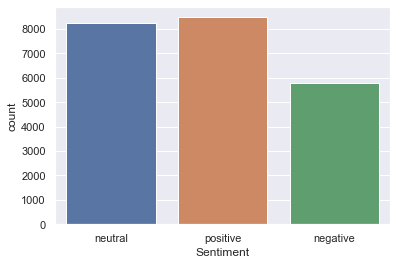

In [11]:
import seaborn as sns 
from matplotlib import pyplot as plt
sns.set()
sns.countplot(x="Sentiment", data = data)

<AxesSubplot:>

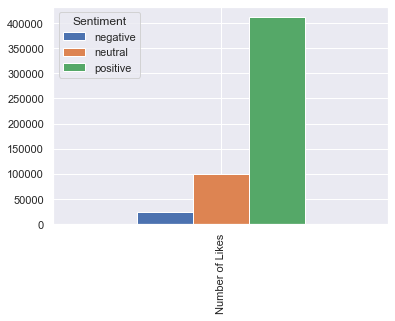

In [12]:
data.groupby(data["Sentiment"]).sum().T.plot(kind="bar")

### Exploratory Data Analysis
+ Text Cleaning 
+ Sentiment Analysis
+ Keyword Extraction
    - Keyword for each Sentiment 
    - WordCloud 

In [13]:
from textblob import TextBlob

In [14]:
def get_sentiment(tweet):
    blob = TextBlob(tweet)
    sentiment = blob.sentiment.polarity
    if sentiment > 0:
        result = "Positive"
    elif sentiment < 0:
        result = "Negative"
    else:
        result = "Neutral"
    return result 

In [15]:
# Testing the function 

print(get_sentiment(""" What are we drinking today @TucanTribe """ ))
print(get_sentiment(""" Amazing @CanadaSoccerEN  #WorldCup2022 launch 
                        video.Shows how much the face of Canada and 
                        our menâ€™s national team have changed since 
                        our last World """))
print(get_sentiment(""" #Qatar tried to help its useless soccer team 5 
                        minutes into the inaugural game,
                        by denying an undoubtedly perfectly good goal to
                        #Ecuador @ #WorldCup2022 """))

Neutral
Positive
Negative


In [16]:
# Creating a new Columns to store the defined function after application   

In [17]:
data["New_Sentiment"] = data["Sentiment"].apply(get_sentiment)

In [18]:
data.drop('Sentiment',axis=1, inplace=True)

In [19]:
data.head(3)

Number of Likes     Source of Tweet  \
0                4     Twitter Web App   
1                3  Twitter for iPhone   
2                1  Twitter for iPhone   

                                               Tweet New_Sentiment  
0  What are we drinking today @TucanTribe \n@MadB...       Neutral  
1  Amazing @CanadaSoccerEN  #WorldCup2022 launch ...      Positive  
2  Worth reading while watching #WorldCup2022 htt...      Positive

### Text Cleaning 
   + Removing stopwords
   + Special characters 
   + Punctuations
   + Emojis 

In [20]:
import neattext as nfx

In [21]:
dir(nfx)

['AUTOMATED_READ_INDEX',
 'BTC_ADDRESS_REGEX',
 'CONTRACTIONS_DICT',
 'CURRENCY_REGEX',
 'CURRENCY_SYMB_REGEX',
 'Callable',
 'Counter',
 'CreditCard_REGEX',
 'DATE_REGEX',
 'EMAIL_REGEX',
 'EMOJI_REGEX',
 'FUNCTORS_WORDLIST',
 'HASTAG_REGEX',
 'HTML_TAGS_REGEX',
 'List',
 'MASTERCard_REGEX',
 'MD5_SHA_REGEX',
 'MOST_COMMON_PUNCT_REGEX',
 'NUMBERS_REGEX',
 'PHONE_REGEX',
 'PUNCT_REGEX',
 'PoBOX_REGEX',
 'SPECIAL_CHARACTERS_REGEX',
 'STOPWORDS',
 'STOPWORDS_de',
 'STOPWORDS_en',
 'STOPWORDS_es',
 'STOPWORDS_fr',
 'STOPWORDS_ru',
 'STOPWORDS_yo',
 'STREET_ADDRESS_REGEX',
 'TextCleaner',
 'TextExtractor',
 'TextFrame',
 'TextMetrics',
 'TextPipeline',
 'Tuple',
 'URL_PATTERN',
 'USER_HANDLES_REGEX',
 'VISACard_REGEX',
 'ZIP_REGEX',
 '__builtins__',
 '__cached__',
 '__doc__',
 '__file__',
 '__loader__',
 '__name__',
 '__package__',
 '__path__',
 '__spec__',
 '__version__',
 'clean_text',
 'defaultdict',
 'digit2words',
 'emoji_explainer',
 'emojify',
 'explainer',
 'extract_btc_address',
 

In [22]:
data["Clean_Tweet"] = data["Tweet"].apply(nfx.remove_stopwords)

In [23]:
data["Clean_Tweet"] = data["Clean_Tweet"].apply(nfx.remove_special_characters)

In [24]:
data["Clean_Tweet"] = data["Clean_Tweet"].apply(nfx.remove_punctuations)

In [25]:
data["Clean_Tweet"] = data["Clean_Tweet"].apply(nfx.remove_emojis)

In [26]:
data["Clean_Tweet"] = data["Clean_Tweet"].apply(nfx.remove_hashtags)

In [27]:
data["Clean_Tweet"] = data["Clean_Tweet"].apply(nfx.remove_userhandles)

In [28]:
data["Clean_Tweet"] = data["Clean_Tweet"].apply(nfx.remove_urls)

In [29]:
data.head(4)

Number of Likes     Source of Tweet  \
0                4     Twitter Web App   
1                3  Twitter for iPhone   
2                1  Twitter for iPhone   
3                1     Twitter Web App   

                                               Tweet New_Sentiment  \
0  What are we drinking today @TucanTribe \n@MadB...       Neutral   
1  Amazing @CanadaSoccerEN  #WorldCup2022 launch ...      Positive   
2  Worth reading while watching #WorldCup2022 htt...      Positive   
3  Golden Maknae shinning bright\n\nhttps://t.co/...      Positive   

                                         Clean_Tweet  
0  drinking today TucanTribe MadBears lkincalgo a...  
1  Amazing CanadaSoccerEN WorldCup2022 launch vid...  
2  Worth reading watching WorldCup2022 httpstco1S...  
3  Golden Maknae shinning bright httpstco4AyZbzGT...

In [30]:
data.drop("Tweet",axis=1,inplace=True)

In [31]:
data.head(3)

Number of Likes     Source of Tweet New_Sentiment  \
0                4     Twitter Web App       Neutral   
1                3  Twitter for iPhone      Positive   
2                1  Twitter for iPhone      Positive   

                                         Clean_Tweet  
0  drinking today TucanTribe MadBears lkincalgo a...  
1  Amazing CanadaSoccerEN WorldCup2022 launch vid...  
2  Worth reading watching WorldCup2022 httpstco1S...

### Keyword Extraction
+ Extracting the most common keywords 

In [32]:
from collections import Counter

In [33]:
# Defining extraction function 

def keyword_extraction (tweet,num=50):
    token = [tok for tok in tweet.split()]
    most_common_keyword = Counter(token).most_common(num)
    return dict(most_common_keyword)

In [34]:
# List for all the sentiments 

sentiment_list = data["New_Sentiment"].unique().tolist()

In [35]:
sentiment_list

['Neutral', 'Positive', 'Negative']

In [40]:
# Making a list of all the Positive Sentiments in the Cleaned tweet

positive_list = data[data["New_Sentiment"]=='Positive']["Clean_Tweet"].tolist()
positive_list

['Amazing CanadaSoccerEN WorldCup2022 launch video Shows face Canada mens national team changed World Cup entry 1986 Cant wait boys action Canada FIFA World Cup Opening Video httpstco7g73vvwtg8',
 'Worth reading watching WorldCup2022 httpstco1SQrNa2dYU',
 'Golden Maknae shinning bright httpstco4AyZbzGTX4 JeonJungkook Jungkook   JK GoldenMaknae bunny Kookie Jungshook BTS  WorldCup2022 FIFAKOOK BTStwt',
 'World Cup starts Qatar its Black Awareness Day Brazil Despite atrocities linked years host Fifa soccer fundamental lower classes Black Brown Vini Jr identifies WorldCup2022 diadaconsciencianegra CopaDoMundo2022 httpstco8mI9UqNWX7',
 'WorldCup2022 ITVSport amp LFSYSTEMMUSIC Hungry Love ',
 'happy night socios SociosTurkiye CHZ PFL socios WorldCup2022 httpstco1sDsWvrztU',
 'Lets TeamUSA WorldCup2022',
 'Tyler Adams CAPTAIN moment WorldCup2022 moment puts USMNT back hits banger makes household name Bookmark bitches',
 'good promising projectshould look forward success project Sunita266 Sas

In [42]:
# Joining all the words together into a document 

positive_docx = ' '.join(positive_list)
print(positive_docx)

Amazing CanadaSoccerEN WorldCup2022 launch video Shows face Canada mens national team changed World Cup entry 1986 Cant wait boys action Canada FIFA World Cup Opening Video httpstco7g73vvwtg8 Worth reading watching WorldCup2022 httpstco1SQrNa2dYU Golden Maknae shinning bright httpstco4AyZbzGTX4 JeonJungkook Jungkook   JK GoldenMaknae bunny Kookie Jungshook BTS  WorldCup2022 FIFAKOOK BTStwt World Cup starts Qatar its Black Awareness Day Brazil Despite atrocities linked years host Fifa soccer fundamental lower classes Black Brown Vini Jr identifies WorldCup2022 diadaconsciencianegra CopaDoMundo2022 httpstco8mI9UqNWX7 WorldCup2022 ITVSport amp LFSYSTEMMUSIC Hungry Love  happy night socios SociosTurkiye CHZ PFL socios WorldCup2022 httpstco1sDsWvrztU Lets TeamUSA WorldCup2022 Tyler Adams CAPTAIN moment WorldCup2022 moment puts USMNT back hits banger makes household name Bookmark bitches good promising projectshould look forward success project Sunita266 SashikantaPatt9 naresh661302 TopGoal 

In [43]:
# Making a list of all the Negative Sentiments in the Cleaned tweet

Negative_list = data[data["New_Sentiment"]=='Negative']["Clean_Tweet"].tolist()
Negative_list

['BBC cares human rights homosexual rights women rights opening ceremony saying opening ceremony BBC censor WorldCup2022 opening ceremony httpstcof72P03ZN2k',
 'like mexican fans able scream PUTO now homophobic qatar FIFAWorldCup WorldCup2022',
 'Really Football Monday morning 9 12 3 need pinch myself happening WorldCup2022',
 'Qatar tried help useless soccer team 5 minutes inaugural game denying undoubtedly perfectly good goal Ecuador  WorldCup2022 world cup host FAIL httpstcoY2YwlQQwFE',
 'ALosersLament Majstar7 piersmorgan racist uncultured inbreed fool prove be saying WorldCup2022',
 'realDonaldTrump DonaldJTrumpJr suck dick RT LaurenBoebert WorldCup2022 ukrainecounteroffensive httpstcoqVRtGje0DI',
 'need hypocritical medias double standards WorldCup2022',
 'BBC cares human rights gay rights women rights opening ceremony saying opening ceremony BBC censor WorldCup2022 opening ceremony httpstcoGmjpUEetmJ',
 'looks football player 4th division QatarWorldCup2022 Soccer Football WorldC

In [44]:
# Joining all the words together into a document 

Negative_docx = ' '.join(Negative_list)
print(Negative_docx)

BBC cares human rights homosexual rights women rights opening ceremony saying opening ceremony BBC censor WorldCup2022 opening ceremony httpstcof72P03ZN2k like mexican fans able scream PUTO now homophobic qatar FIFAWorldCup WorldCup2022 Really Football Monday morning 9 12 3 need pinch myself happening WorldCup2022 Qatar tried help useless soccer team 5 minutes inaugural game denying undoubtedly perfectly good goal Ecuador  WorldCup2022 world cup host FAIL httpstcoY2YwlQQwFE ALosersLament Majstar7 piersmorgan racist uncultured inbreed fool prove be saying WorldCup2022 realDonaldTrump DonaldJTrumpJr suck dick RT LaurenBoebert WorldCup2022 ukrainecounteroffensive httpstcoqVRtGje0DI need hypocritical medias double standards WorldCup2022 BBC cares human rights gay rights women rights opening ceremony saying opening ceremony BBC censor WorldCup2022 opening ceremony httpstcoGmjpUEetmJ looks football player 4th division QatarWorldCup2022 Soccer Football WorldCup2022 boycott watching chosen gam

In [39]:
# Making a list of all the Neutral Sentiments in the Cleaned tweet

Neutral_list = data[data["New_Sentiment"]=='Neutral']["Clean_Tweet"].tolist()
Neutral_list

['drinking today TucanTribe MadBears lkincalgo algoanna WorldCup2022 httpstcoOga3TzvG5h',
 'Look like Jamaican football team naw follow worldcup WorldCup2022',
 'World Cup prediction  ber  Final GER BEL WorldCup2022',
 'RT Quicktake Qatari officials set ban sale alcohol WorldCup2022 stadiums dramatically reversing decision allow sales Budweiser beer SimoneFoxman latest httpstco3iyP1Tj98S httpstcoDx2naRMhFm',
 'Nicki Minaj Maluma amp Myriam unite WorldCup2022 anthem TukohTaka httpstcoK9pC8Hcada',
 'Hey AlphonsoDavies hows hamstring CanadaSoccer WorldCup2022 FIFAWorldCup2022 Davies',
 'SBS drama ltCheerUpgt reportedly cancel broadcast 1121 1122 1128 WorldCup2022 episode 12 air 1129 BaeInHyuk HanJiHyun KimHyunJin JangGyuRi LeeEunSaem httpstco43z8pxcAPX',
 'Cameroon FecafootOfficie WorldCup2022 httpstcoBvkxIlZRlG',
 'JUNGKOOK opening ceremony World Cup bts btsarmy jungkook worldcup worldcup2022 btsarmy fifaworldcup qatar2022 qatar football soccer w   taehyung  w  qatar worldcup2018 fyp fyp

In [45]:
# Joining all the words together into a document 

Neutral_docx = ' '.join(Neutral_list)
print(Neutral_docx)

drinking today TucanTribe MadBears lkincalgo algoanna WorldCup2022 httpstcoOga3TzvG5h Look like Jamaican football team naw follow worldcup WorldCup2022 World Cup prediction  ber  Final GER BEL WorldCup2022 RT Quicktake Qatari officials set ban sale alcohol WorldCup2022 stadiums dramatically reversing decision allow sales Budweiser beer SimoneFoxman latest httpstco3iyP1Tj98S httpstcoDx2naRMhFm Nicki Minaj Maluma amp Myriam unite WorldCup2022 anthem TukohTaka httpstcoK9pC8Hcada Hey AlphonsoDavies hows hamstring CanadaSoccer WorldCup2022 FIFAWorldCup2022 Davies SBS drama ltCheerUpgt reportedly cancel broadcast 1121 1122 1128 WorldCup2022 episode 12 air 1129 BaeInHyuk HanJiHyun KimHyunJin JangGyuRi LeeEunSaem httpstco43z8pxcAPX Cameroon FecafootOfficie WorldCup2022 httpstcoBvkxIlZRlG JUNGKOOK opening ceremony World Cup bts btsarmy jungkook worldcup worldcup2022 btsarmy fifaworldcup qatar2022 qatar football soccer w   taehyung  w  qatar worldcup2018 fyp fyp httpstcoMeeUVxRKiZ happened Turki

In [46]:
# Applying the function to get the most common keyword for each sentiment 

In [47]:
# most common keywords for Positive 

positive_keywords = keyword_extraction(positive_docx)

In [57]:
print(positive_keywords)

{'WorldCup2022': 8057, 'World': 1708, 'Cup': 1627, 'FIFAWorldCup': 1400, 'Qatar': 1341, 'WorldCup': 1093, 'QatarWorldCup2022': 832, 'Qatar2022': 794, 'Ecuador': 687, '2022': 574, 'world': 542, 'football': 539, 'opening': 493, 'today': 406, 'team': 398, 'game': 390, 'time': 375, 'win': 371, 'worldcup2022': 369, 'cup': 366, 'Lets': 353, 'amp': 352, 'FIFA': 350, 'best': 349, 'FIFAWorldCup2022': 347, 'goal': 312, 'ceremony': 309, 'England': 295, 'Good': 291, 'day': 291, 'WorldcupQatar2022': 279, 'Im': 278, 'start': 278, 'JungkookAtFIFAWorldCup': 250, 'match': 245, 'watch': 225, 'Valencia': 215, 'good': 211, 'proud': 209, 'ready': 201, 'tournament': 201, 'like': 196, 'here': 193, 'Argentina': 193, 'great': 191, 'Football': 183, 'Jungkook': 182, 'watching': 176, 'love': 174, 'luck': 169}


In [58]:
# most common keywords for Negative

Negative_keywords = keyword_extraction(Negative_docx)

In [59]:
print(Negative_keywords)

{'WorldCup2022': 5631, 'Qatar': 1627, 'World': 696, 'FIFAWorldCup': 671, 'Cup': 669, 'WorldCup': 652, 'Qatar2022': 538, 'offside': 482, 'goal': 468, 'VAR': 445, 'Ecuador': 439, 'QatarWorldCup2022': 428, 'like': 335, 'world': 333, 'football': 326, 'opening': 319, 'game': 316, 'QATECU': 267, 'corruption': 245, 'team': 244, 'JioCinema': 241, 'minutes': 232, 'FIFA': 231, 'people': 231, 'WorldcupQatar2022': 229, 'cup': 204, 'match': 193, 'going': 192, 'Im': 187, 'corrupt': 185, 'disallowed': 171, 'amp': 169, 'ceremony': 168, 'country': 166, 'cant': 157, 'host': 155, 'FIFAWorldCup2022': 153, 'it': 148, 'watch': 147, 'rights': 144, 'time': 144, 'money': 142, 'know': 142, 'tournament': 138, 'start': 134, 'decision': 132, 'BBC': 128, 'watching': 128, 'way': 127, 'right': 126}


In [60]:
# most common keywords for Neutral

Neutral_keywords = keyword_extraction(Neutral_docx)

In [61]:
print(Neutral_keywords)

{'WorldCup2022': 7864, 'Qatar': 2628, 'World': 2365, 'Cup': 2296, 'FIFAWorldCup': 1494, 'FIFA': 1411, '2022': 1369, 'Qatar2022': 1314, 'Ecuador': 1151, 'WorldCup': 1112, 'QatarWorldCup2022': 793, 'Opening': 731, 'Ceremony': 675, 'opening': 469, 'Live': 447, 'goal': 410, 'match': 406, 'vs': 388, 'football': 365, 'game': 363, 'offside': 355, 'WorldcupQatar2022': 342, 'VAR': 330, 'FIFAWorldCup2022': 318, 'worldcup2022': 306, 'England': 302, 'team': 299, 'win': 298, 'QATECU': 281, 'amp': 280, 'LIVE': 274, 'Valencia': 268, 'today': 259, 'Online': 255, 'world': 249, '2': 244, '1': 244, 'Tv': 237, 'ceremony': 235, 'Streams': 227, 'like': 214, 'OpeningCeremony': 206, 'time': 200, 'cup': 188, 'httpstcoVV7MwdFhrh': 188, 'watch': 187, '3': 177, 'fans': 168, 'RaisePalestineFlag': 168, 'Palestinian': 167}


### Plotting the Keywords/ Most Common Word using word Cloud 
   + Positive 
   + Negative
   + Neutral 

In [79]:
# Definning a function for plotting

def plot_most_common_words(mydict,sentiment_name):
    df_1 = pd.DataFrame(mydict.items(),columns=["token","counts"])
    plt.figure(figsize=(20,10))
    plt.title("plot of {} most common keywords".format(sentiment_name))
    sns.barplot(x="token", y="counts",data=df_1)
    plt.xticks(rotation=90)
    plt.show()

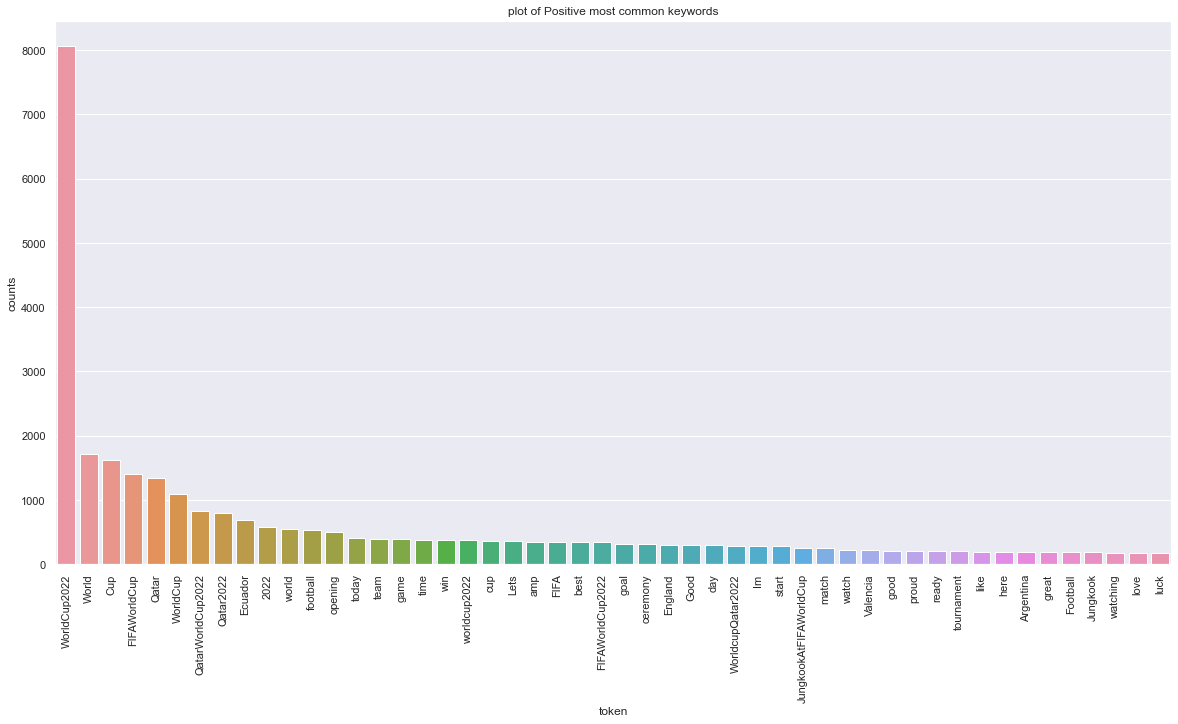

In [80]:
plot_most_common_words(positive_keywords,"Positive")

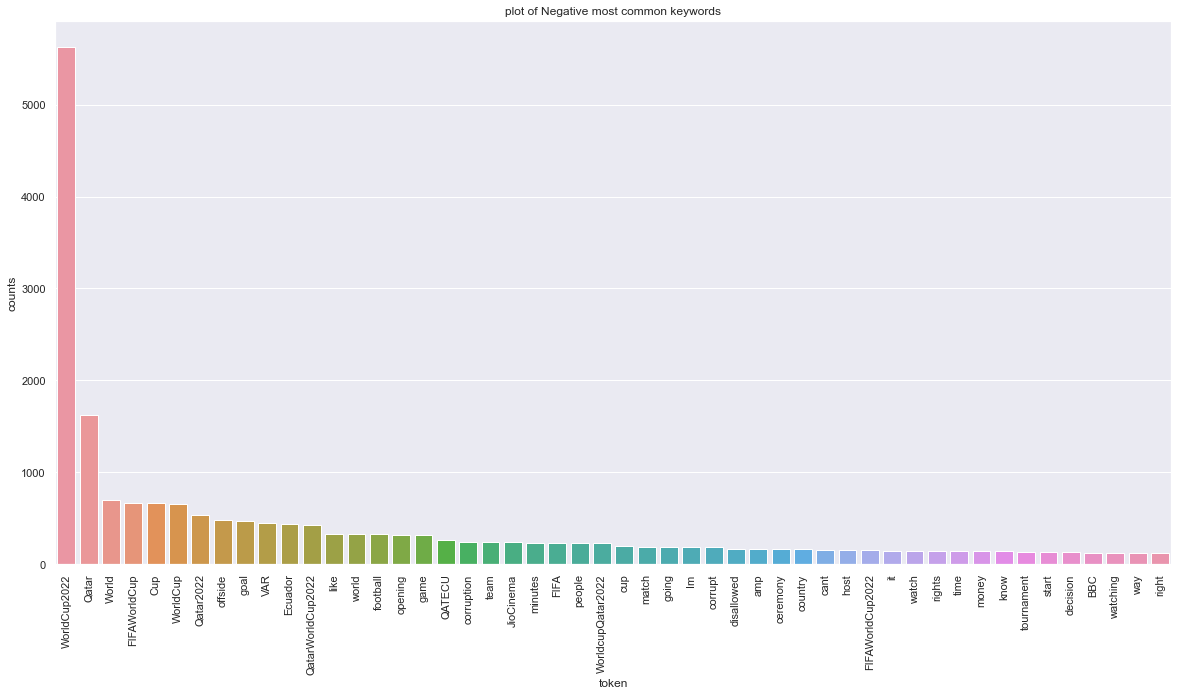

In [81]:
plot_most_common_words(Negative_keywords,"Negative")

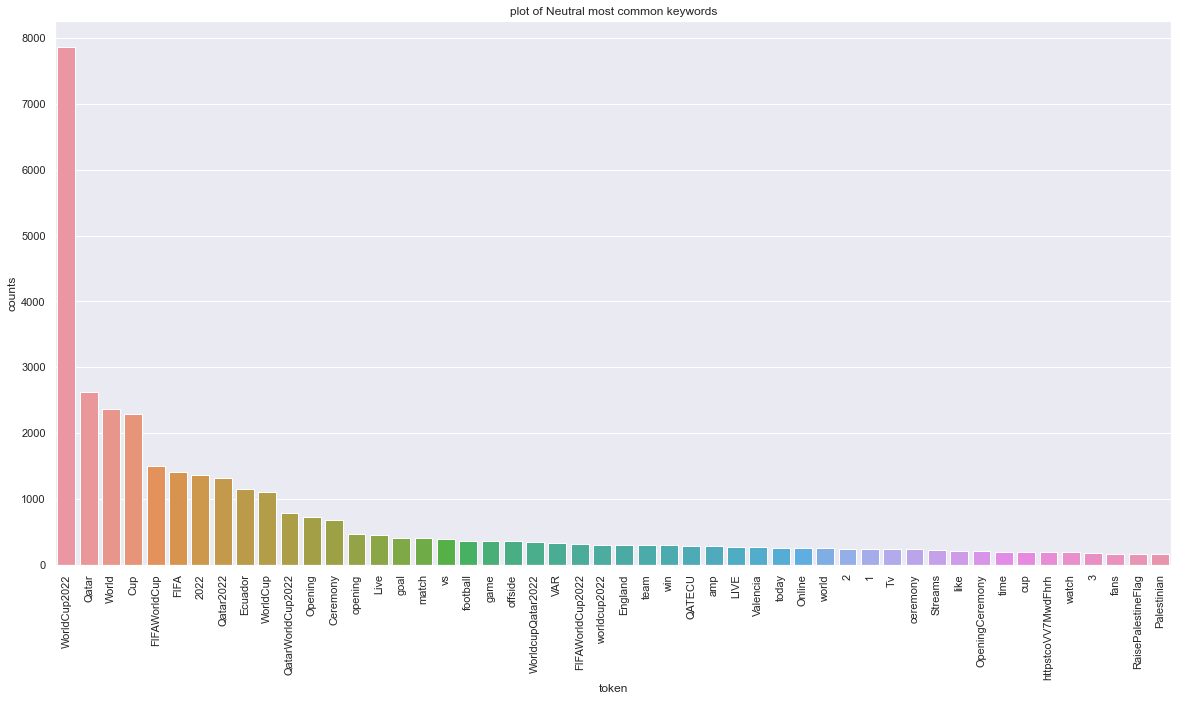

In [82]:
plot_most_common_words(Neutral_keywords,"Neutral")

### Word Cloud 

In [68]:
from wordcloud import WordCloud

def plot_word_cloud (docx,sentiment_name):
    word_cloud = WordCloud().generate(docx)
    plt.figure(figsize=(20,10))
    plt.title("word cloud for {}".format(sentiment_name))
    plt.imshow(word_cloud,interpolation="bilinear")
    plt.axis("off")
    plt.show

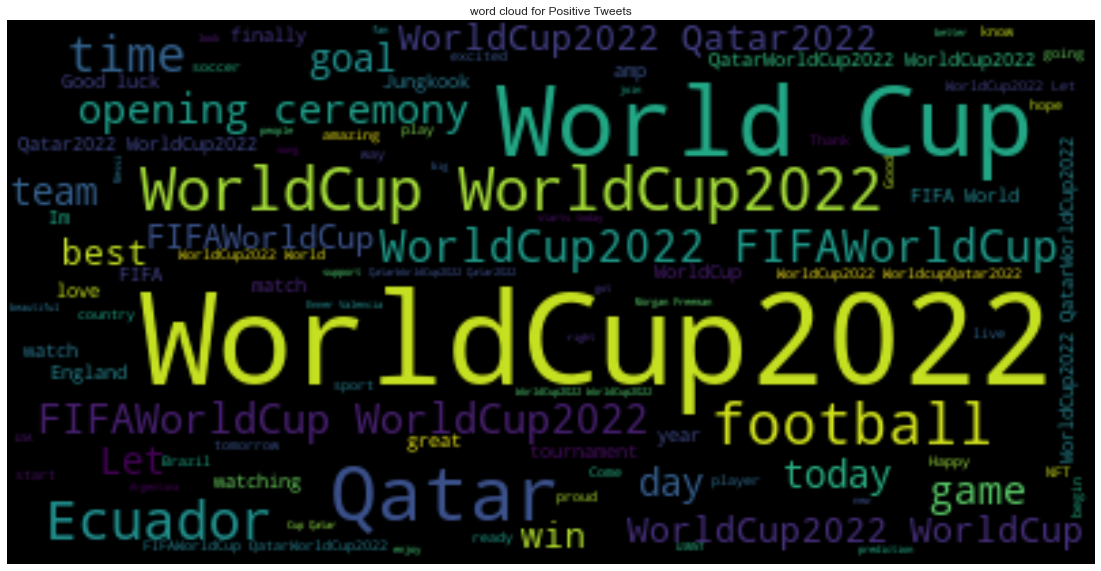

In [72]:
plot_word_cloud(positive_docx,"Positive Tweets")

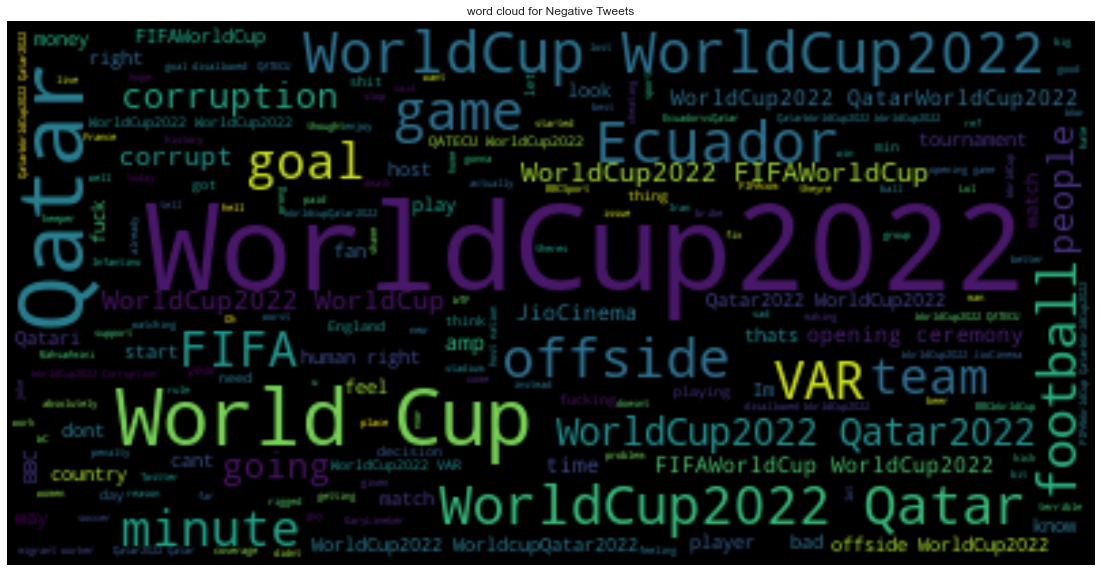

In [73]:
plot_word_cloud(Negative_docx,"Negative Tweets")

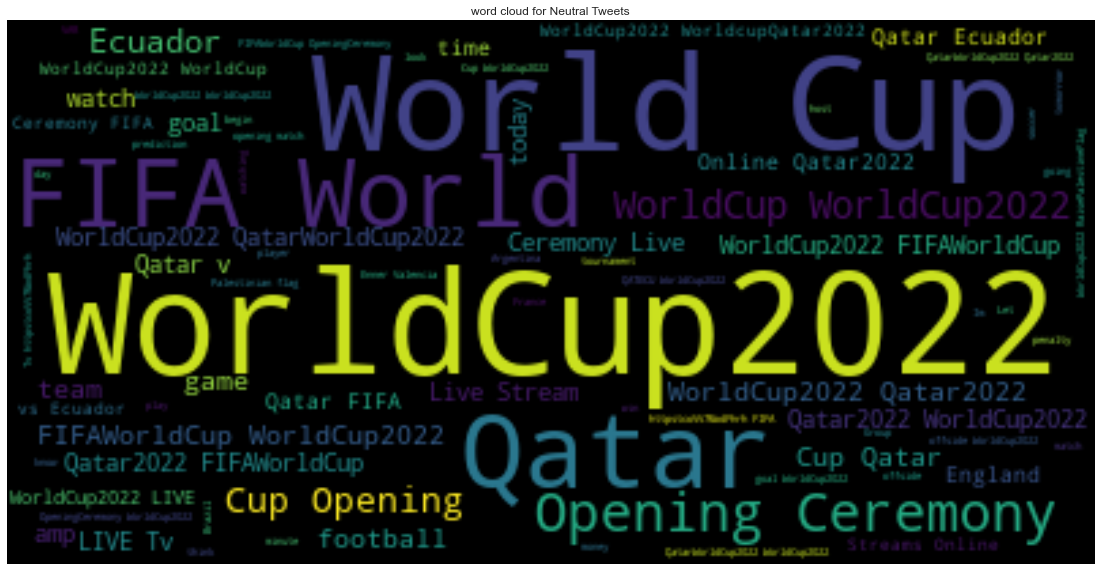

In [74]:
plot_word_cloud(Neutral_docx,"Neutral Tweets")

### Thank You!
### Olatunde